In [1]:
                                              #Telco Customer

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import linkage,fcluster
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

In [2]:
tc = pd.read_excel("Telco_customer_churn (1).xlsx")

print(tc.describe())

tc.info()

        Count  Number of Referrals  Tenure in Months  \
count  7043.0          7043.000000       7043.000000   
mean      1.0             1.951867         32.386767   
std       0.0             3.001199         24.542061   
min       1.0             0.000000          1.000000   
25%       1.0             0.000000          9.000000   
50%       1.0             0.000000         29.000000   
75%       1.0             3.000000         55.000000   
max       1.0            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                20.515405   
std                            15.448113                20.418940   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%         

In [3]:
#we have to dro the unnecessary columns
tc.drop(tc.columns[[0,1,2,3,4,13,14,15,16,17,18,19,20]],axis=1 , inplace=True)
tc

,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,1,None,No,0.00,No,Yes,DSL,8,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,None,Yes,22.77,No,No,None,0,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,72,None,Yes,29.66,Yes,Yes,Fiber Optic,59,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,11,None,No,0.00,No,Yes,DSL,17,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


In [4]:
#now we have normalize the numerical columns.
def norm_fnc(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

norm_tc = norm_fnc(tc.iloc[ : , [0,3,7,11,12,13,14,15,16]])
norm_tc.describe()

,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.442067,0.459271,0.241358,0.462803,0.260972,0.039409,0.045738,0.210143,0.251967
std,0.345663,0.309024,0.240223,0.299403,0.261507,0.158719,0.167367,0.237511,0.239606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112676,0.184237,0.035294,0.171642,0.044005,0.000000,0.000000,0.019790,0.048859
50%,0.394366,0.457892,0.200000,0.518408,0.158753,0.000000,0.000000,0.112615,0.174551
75%,0.760563,0.728046,0.317647,0.712438,0.434780,0.000000,0.000000,0.334136,0.399715
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Now we have to create dummy variable for categorical columns.

tc_dummy = pd.get_dummies(tc)


In [6]:

tc_new = pd.concat([norm_tc , tc_dummy], axis= 1)
tc_new.describe()

#now the data set has same range in 0 to 1

,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Tenure in Months,...,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.442067,0.459271,0.241358,0.462803,0.260972,0.039409,0.045738,0.210143,0.251967,32.386767,...,0.430924,0.216669,0.512566,0.220077,0.267358,0.407781,0.592219,0.555019,0.390317,0.054664
std,0.345663,0.309024,0.240223,0.299403,0.261507,0.158719,0.167367,0.237511,0.239606,24.542061,...,0.495241,0.412004,0.499878,0.414328,0.442612,0.491457,0.491457,0.496999,0.487856,0.227340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112676,0.184237,0.035294,0.171642,0.044005,0.000000,0.000000,0.019790,0.048859,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.394366,0.457892,0.200000,0.518408,0.158753,0.000000,0.000000,0.112615,0.174551,29.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.760563,0.728046,0.317647,0.712438,0.434780,0.000000,0.000000,0.334136,0.399715,55.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


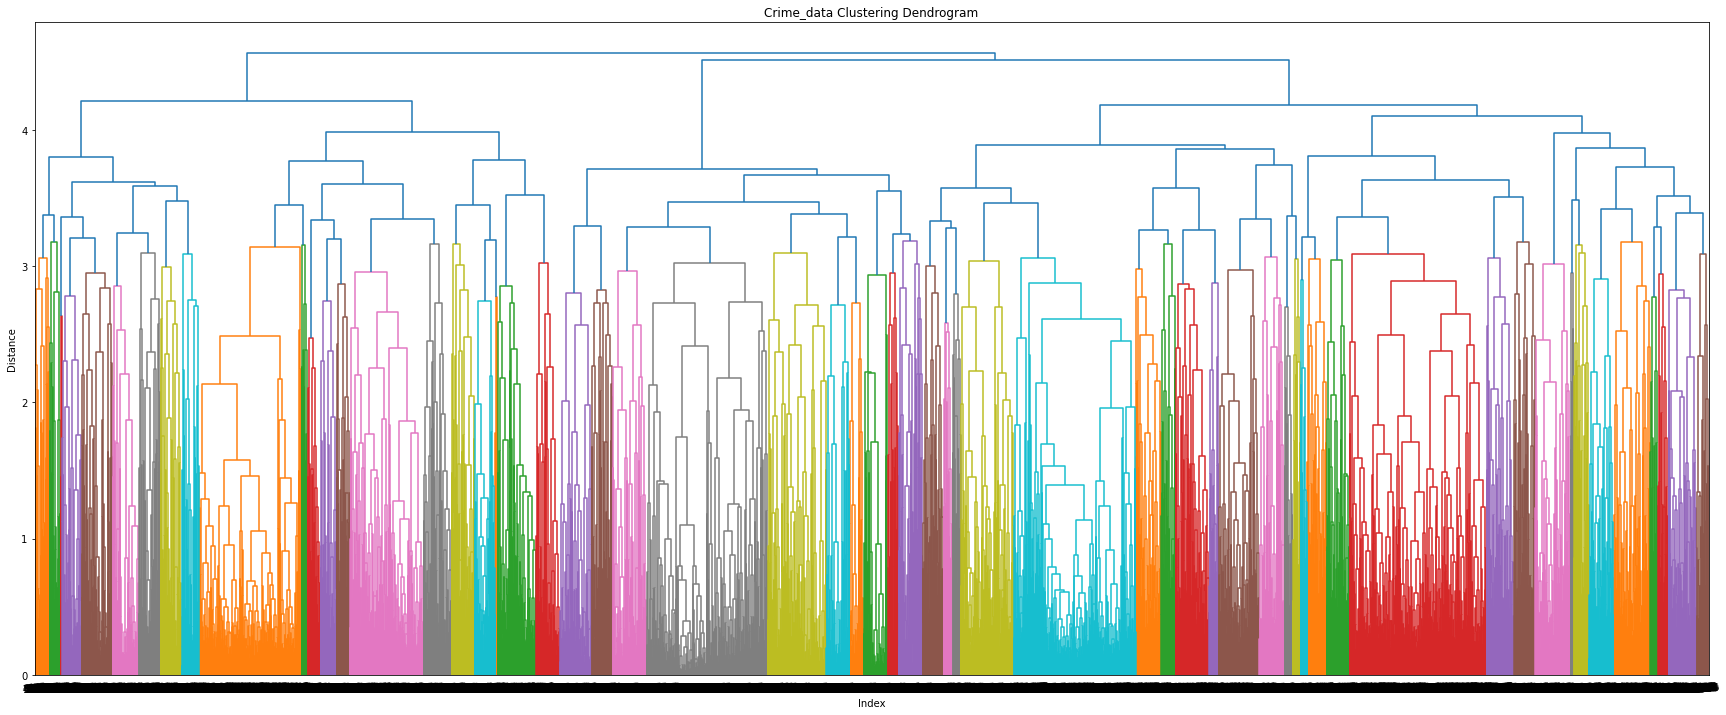

In [8]:
#now we've to create the linkage of the data.
z = linkage(tc_new , method = "complete" ,metric = "euclidean")
plt.figure(figsize=(30, 12));plt.title('Telco customer Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 5,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [9]:
tc_comp = AgglomerativeClustering(n_clusters = 5 , linkage = "complete" ,affinity = "euclidean" ).fit(tc_new)
tc_comp.labels_

array([3, 4, 1, ..., 4, 3, 4], dtype=int64)

In [20]:
tc_cluster_column = pd.Series(tc_comp.labels_)

#now assign this matrix to to data set as a new column.

tc['grouping']=tc_cluster_column

tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tenure in Months                   7043 non-null   int64  
 1   Offer                              7043 non-null   object 
 2   Phone Service                      7043 non-null   object 
 3   Avg Monthly Long Distance Charges  7043 non-null   float64
 4   Multiple Lines                     7043 non-null   object 
 5   Internet Service                   7043 non-null   object 
 6   Internet Type                      7043 non-null   object 
 7   Avg Monthly GB Download            7043 non-null   int64  
 8   Contract                           7043 non-null   object 
 9   Paperless Billing                  7043 non-null   object 
 10  Payment Method                     7043 non-null   object 
 11  Monthly Charge                     7043 non-null   float

In [23]:
#now take the grouping column to the 1st.

tc_final = tc.iloc[ : ,[17,0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16] ]
tc_final

,grouping,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,3,1,None,No,0.00,No,DSL,8,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,4,8,Offer E,Yes,48.85,Yes,Fiber Optic,17,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1,18,Offer D,Yes,11.33,Yes,Fiber Optic,52,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4,25,Offer C,Yes,19.76,No,Fiber Optic,12,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,0,37,Offer C,Yes,6.33,Yes,Fiber Optic,14,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,72,None,Yes,22.77,No,None,0,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,4,24,Offer C,Yes,36.05,Yes,Cable,24,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,4,72,None,Yes,29.66,Yes,Fiber Optic,59,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,3,11,None,No,0.00,No,DSL,17,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


In [15]:
#Aggregate mean of each cluster.
tc_final.iloc[:, 1:].groupby(tc.grouping).mean()

#here we can see there are 5 types of grouping present as per loyal customer.

,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
grouping,,,,,,,,,
0,54.495921,25.484149,26.339161,90.889423,5033.919930,2.508298,11.730769,1390.849003,6433.991404
1,15.654605,25.148033,25.759211,74.910822,1208.236382,1.852645,7.111842,386.941618,1600.437197
2,30.586501,24.973965,0.000000,21.079194,663.462936,1.653945,0.000000,770.231298,1432.040288
3,31.645441,0.267308,26.879884,42.315557,1498.500362,1.785832,9.088278,7.156990,1512.959797
4,26.571069,26.068629,26.140881,78.540252,2225.214560,1.849975,6.981132,704.867616,2935.213333
